# Outlier Detection (Part2)
> Skewed distribution and adjusted boxplot

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from matplotlib import cbook
from matplotlib.pyplot import figure

In [81]:
df_listings=pd.read_csv('listings.csv')

In [82]:
"""Filling the null values of rating by mean"""

df_listings["review_scores_rating"] = df_listings["review_scores_rating"].fillna(df_listings["review_scores_rating"].mean())

In [83]:
"""Function to remove $ sign"""

def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [84]:
df_listings.price = df_listings.price.apply(remove_sign,sign='$')

Text(0, 0.5, 'Price ($)')

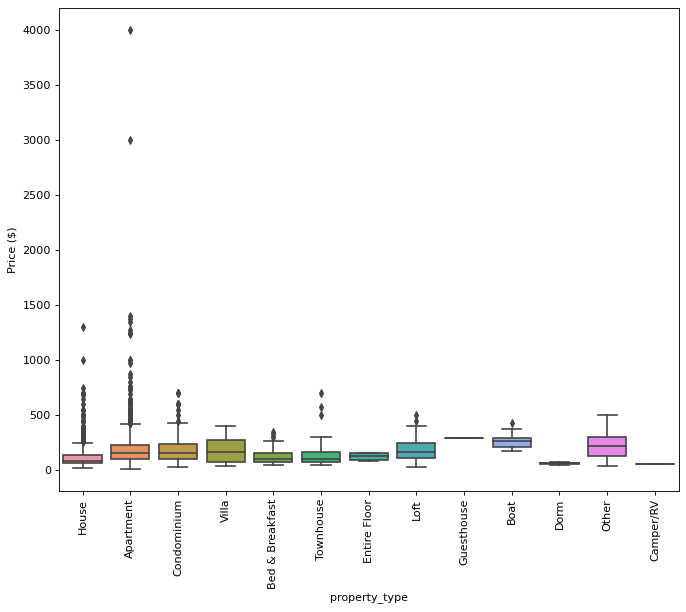

In [85]:
"""Boxplot of price across property type"""
figure(figsize=(10, 8), dpi=80)
sns.boxplot(y='price', x='property_type',data=df_listings)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

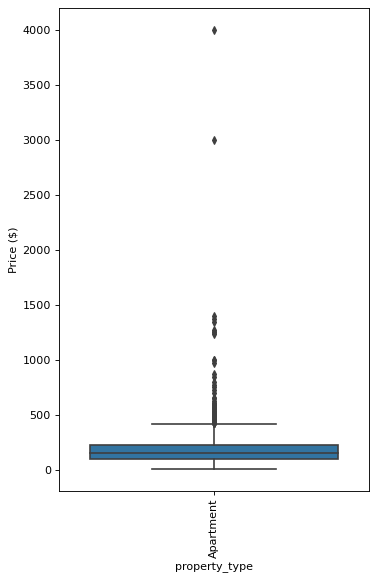

In [86]:
"""Boxplot of price across for Apartments"""

df_listings_apt = df_listings[df_listings['property_type'] == 'Apartment']
figure(figsize=(5, 8), dpi=80)
sns.boxplot(y='price', x='property_type',data=df_listings_apt)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

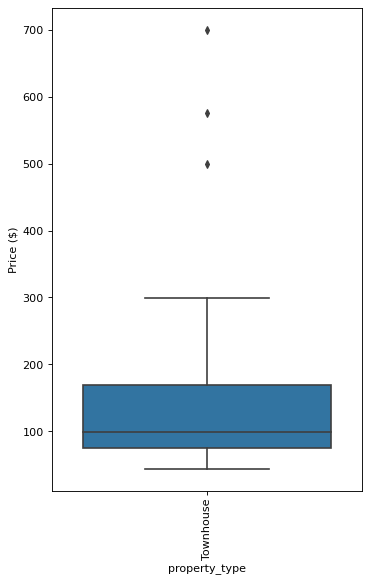

In [87]:
"""Boxplot of price across for Townhouse to check if it is skewed"""

df_listings_apt = df_listings[df_listings['property_type'] == 'Townhouse']
figure(figsize=(5, 8), dpi=80)
sns.boxplot(y='price', x='property_type',data=df_listings_apt)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [88]:
df = df_listings_apt
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3-Q1
df_final = df[~((df.price<(Q1-1.7*IQR)) | (df.price>(Q3+1.7*IQR)))]

Text(0, 0.5, 'Price ($)')

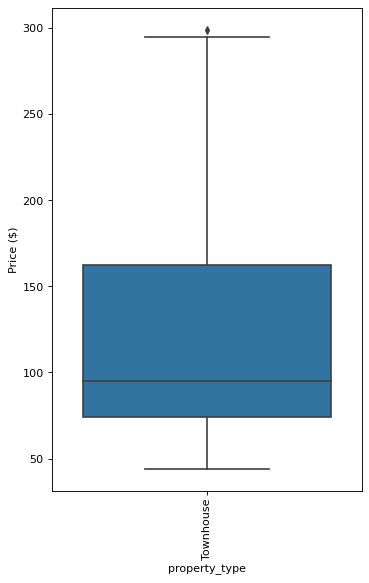

In [89]:
figure(figsize=(5, 8), dpi=80)
sns.boxplot(y='price', x='property_type', data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [90]:
stat = boxplot_stats(df_final.price)
stat

[{'mean': 123.0,
  'iqr': 88.5,
  'cilo': 75.54380837247282,
  'cihi': 114.45619162752718,
  'whishi': 295.0,
  'whislo': 44.0,
  'fliers': array([299.]),
  'q1': 74.0,
  'med': 95.0,
  'q3': 162.5}]

# SIQR

In [91]:
df = df_listings_apt
Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.50)
Q3 = df.price.quantile(0.75)
df_final = df[~((df.price<(Q2-3*(Q2-Q1))) | (df.price>(Q2+3*(Q3-Q2))))]

Text(0, 0.5, 'Price ($)')

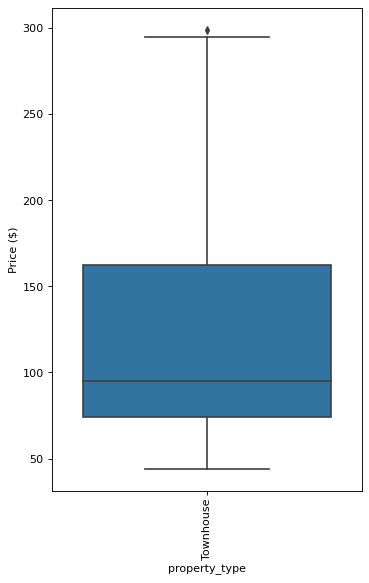

In [92]:
"""Boxplot of price for apt after SIQR implementation"""
figure(figsize=(5, 8), dpi=80)
sns.boxplot(y='price', x='property_type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [93]:
stat = boxplot_stats(df_final.price)
stat

[{'mean': 123.0,
  'iqr': 88.5,
  'cilo': 75.54380837247282,
  'cihi': 114.45619162752718,
  'whishi': 295.0,
  'whislo': 44.0,
  'fliers': array([299.]),
  'q1': 74.0,
  'med': 95.0,
  'q3': 162.5}]

In [94]:
len(stat[0]['fliers'])

1

# Medcouples

In [97]:
from statsmodels.stats.stattools import medcouple
   
arr = np.array([1, 2, 3, 8, 12, 6, 15])
medcouple(arr)

array(0.14545455)